# Introduction to Python for Bioinformatics and the Life Sciences

## Final Seminar Project Report 

### Author: **[Ajay Sah](https://github.com/aajusah98/)**
### Matriculation Number : 23172531

## 2. Data Source

### Datasource1: Normalized bulk gene expression data from breast cancer patients here
- Data URL: [Link to dataset](https://gdc-hub.s3.us-east-1.amazonaws.com/download/TCGA-BRCA.htseq_fpkm.tsv.gz)
- Data Type: TSV

### Datasource2: Corresponding phenotype data here:
- Data URL: [Link to dataset](https://gdc-hub.s3.us-east-1.amazonaws.com/download/TCGA-BRCA.GDC_phenotype.tsv.gz)
- Data Type: TSV

##### Installing Required All Librarie

In [1]:

%pip install numpy scipy pandas statsmodels seaborn matplotlib

%pip install gseapy 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


##### Importing All Required Librarie In This Project 

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import matplotlib.pyplot as plt

## Step 1: Load And Filter Data
 
 1.1 **Load both datasets into pandas DataFrame objects.**
 
   - Use sample IDs as indices and gene IDs as columns. If the data is not provided in this format, transpose it if necessary.

In [3]:
phenotype_df= pd.read_csv('TCGA-BRCA.GDC_phenotype.tsv', sep="\t",index_col=0)
gene_expression_df=pd.read_csv('TCGA-BRCA.htseq_fpkm.tsv',sep="\t")

- Printing all the columns in  the phenotype data to know the features of the data which is given by `phenotype_df.columns`

- Printing the shape of the phenotype data to know the shape of the data which is given by `phenotype_df.shape`

- Printing the index of the phenotype data to know the indices which is given by `phenotype_df.index` 

- `phenotype_df.head(10)` Print the first 10 data from the data frame 

In [4]:
print(phenotype_df.columns)
print(phenotype_df.shape)
print(phenotype_df.index)
print(phenotype_df.head(10))

Index(['additional_pharmaceutical_therapy', 'additional_radiation_therapy',
       'additional_surgery_locoregional_procedure',
       'additional_surgery_metastatic_procedure',
       'age_at_initial_pathologic_diagnosis',
       'axillary_lymph_node_stage_method_type',
       'axillary_lymph_node_stage_other_method_descriptive_text',
       'batch_number', 'bcr', 'bcr_followup_barcode',
       ...
       'days_to_collection.samples', 'days_to_sample_procurement.samples',
       'initial_weight.samples', 'is_ffpe.samples', 'oct_embedded.samples',
       'preservation_method.samples', 'sample_type.samples',
       'sample_type_id.samples', 'state.samples', 'tissue_type.samples'],
      dtype='object', length=139)
(1284, 139)
Index(['TCGA-A2-A0CY-01A', 'TCGA-B6-A40B-01A', 'TCGA-AO-A0J8-01A',
       'TCGA-A8-A08J-01A', 'TCGA-E2-A14N-01A', 'TCGA-BH-A1F0-01A',
       'TCGA-BH-A1F0-11B', 'TCGA-BH-A0BZ-01A', 'TCGA-BH-A0BZ-11A',
       'TCGA-AC-A2FM-01A',
       ...
       'TCGA-A8-A07L-01A',

- Printing all the columns in  the gene expression  data to know the features of the data which is given by `phenotype_df.columns`

- Printing the shape of the gene expression  data to know the shape of the data which is given by `phenotype_df.shape`

- Printing the index of the gene expression data to know the indices which is given by `phenotype_df.index` 

- `phenotype_df.head(10)` Print the first 10 data from the data frame 

In [5]:
print(gene_expression_df.columns)
print(gene_expression_df.shape)
print(gene_expression_df.index)
print(gene_expression_df.head(10))

Index(['Ensembl_ID', 'TCGA-E9-A1NI-01A', 'TCGA-A1-A0SP-01A',
       'TCGA-BH-A1EU-11A', 'TCGA-A8-A06X-01A', 'TCGA-E2-A14T-01A',
       'TCGA-AC-A8OS-01A', 'TCGA-A8-A09K-01A', 'TCGA-OL-A5RY-01A',
       'TCGA-BH-A0DG-01A',
       ...
       'TCGA-BH-A0DT-11A', 'TCGA-E9-A1R0-01A', 'TCGA-BH-A0B6-01A',
       'TCGA-B6-A0RN-01A', 'TCGA-A8-A09W-01A', 'TCGA-EW-A1P3-01A',
       'TCGA-A7-A13F-11A', 'TCGA-A2-A0T6-01A', 'TCGA-A7-A5ZW-01A',
       'TCGA-BH-A203-01A'],
      dtype='object', length=1218)
(60483, 1218)
RangeIndex(start=0, stop=60483, step=1)
           Ensembl_ID  TCGA-E9-A1NI-01A  TCGA-A1-A0SP-01A  TCGA-BH-A1EU-11A  \
0   ENSG00000242268.2          0.091708          0.000000          0.057899   
1   ENSG00000270112.3          0.019573          0.004701          0.016302   
2  ENSG00000167578.15          2.235898          1.863334          1.704753   
3   ENSG00000273842.1          0.000000          0.000000          0.000000   
4   ENSG00000078237.5          2.321945          4.226

- As we notice theat index of the gene expression df is numerical RangeIndex(start=0, stop=60483, step=1)  but we need want sample id as indices and gene ID

- we can simply tranpose the dataframe let see what we will get after transposing

- we use `gene_expression_df.T.reset_index()` for transposing it 

In [6]:

# Transpose the Gene Expression  DataFrame
gene_expression_df = gene_expression_df.T.reset_index()


In [7]:
print(gene_expression_df.head(10))
print(gene_expression_df.index)

              index                  0                  1                   2  \
0        Ensembl_ID  ENSG00000242268.2  ENSG00000270112.3  ENSG00000167578.15   
1  TCGA-E9-A1NI-01A           0.091708           0.019573            2.235898   
2  TCGA-A1-A0SP-01A                0.0           0.004701            1.863334   
3  TCGA-BH-A1EU-11A           0.057899           0.016302            1.704753   
4  TCGA-A8-A06X-01A                0.0                0.0            1.947481   
5  TCGA-E2-A14T-01A                0.0                0.0             2.73469   
6  TCGA-AC-A8OS-01A           0.354334                0.0            2.397119   
7  TCGA-A8-A09K-01A                0.0           0.005787            2.337327   
8  TCGA-OL-A5RY-01A                0.0                0.0            2.256976   
9  TCGA-BH-A0DG-01A                0.0                0.0            1.968791   

                   3                  4                   5  \
0  ENSG00000273842.1  ENSG00000078237.5  ENSG

- After transposing we can see that row and colums are swaped but still we have a problem which is numeric vlaues on index and colmun

- .iloc[0]: This selects the first row of the DataFrame, which you are using to set as column headers.

- .drop(0): This function removes the first row from the DataFrame. 

In [8]:
# Set the first row as column headers
gene_expression_df.columns=gene_expression_df.iloc[0] 

# Drop the first row from the DataFrame
gene_expression_df=gene_expression_df.drop(0)

# set the index
gene_expression_df.set_index('Ensembl_ID', inplace=True)

- Printng index,columns, shape and dataframe head to verify if we are on  good track 
- and our dataframe look good now , now sample id is as indices and gene ids for gene expression 

In [9]:
print(gene_expression_df.columns)
print(gene_expression_df.shape)
print(gene_expression_df.index)
print(gene_expression_df.head(10))

Index(['ENSG00000242268.2', 'ENSG00000270112.3', 'ENSG00000167578.15',
       'ENSG00000273842.1', 'ENSG00000078237.5', 'ENSG00000146083.10',
       'ENSG00000225275.4', 'ENSG00000158486.12', 'ENSG00000198242.12',
       'ENSG00000259883.1',
       ...
       'ENSG00000238244.3', 'ENSG00000186115.11', 'ENSG00000216352.1',
       'ENSG00000267117.1', 'ENSG00000273233.1', 'ENSG00000105063.17',
       'ENSG00000231119.2', 'ENSG00000280861.1', 'ENSG00000123685.7',
       'ENSG00000181518.3'],
      dtype='object', name=0, length=60483)
(1217, 60483)
Index(['TCGA-E9-A1NI-01A', 'TCGA-A1-A0SP-01A', 'TCGA-BH-A1EU-11A',
       'TCGA-A8-A06X-01A', 'TCGA-E2-A14T-01A', 'TCGA-AC-A8OS-01A',
       'TCGA-A8-A09K-01A', 'TCGA-OL-A5RY-01A', 'TCGA-BH-A0DG-01A',
       'TCGA-B6-A0I9-01A',
       ...
       'TCGA-BH-A0DT-11A', 'TCGA-E9-A1R0-01A', 'TCGA-BH-A0B6-01A',
       'TCGA-B6-A0RN-01A', 'TCGA-A8-A09W-01A', 'TCGA-EW-A1P3-01A',
       'TCGA-A7-A13F-11A', 'TCGA-A2-A0T6-01A', 'TCGA-A7-A5ZW-01A',
       '

## Step 1: Load And Filter Data
 
 1.2 **Partition the gene expression data frame into two data frames.**
 
   - such that one data
frame only contains data for primary tumor samples and the other one only contains data
for healthy tissue samples. You find the information necessary to split the data in the
phenotype data. To identify the variable which contains the necessary information on the
sample types, you can have a look at this paper: https://doi.org/10.1093/bib/bbad413
(especially the Methods section).

- As we have to divide our phonedata in two type healthy tissues sample, primary tissues sample we will use `sample_type.samples` feature which conntain the type of the tissues,

- print`phenotype_df['sample_type.samples'].unique()` it will give all the unique values at sample type column

- As we can see that it have 3 differnet type, 

    i. Solid Tissue Normal :- It describes tissue samples that are collected from healthy, non-cancerous regions of the body
    
    ii. Primary Tumor :- Primary tumors are the initial site of cancer growth and are crucial in the diagnosis and treatment planning of cancer

    iii. Metastatic :- Metastatic cancer is classified and treated based on the type of the primary cancer
    
    
- There is nan, let drop that nan data

In [10]:
print(phenotype_df['sample_type.samples'].unique())

['Primary Tumor' 'Solid Tissue Normal' 'Metastatic' nan]


In [11]:
#Dropping nan values from pheno_data
phenotype_df.dropna(subset=['sample_type.samples'], inplace=True)
sample_types = phenotype_df['sample_type.samples'].unique()
print(sample_types)

['Primary Tumor' 'Solid Tissue Normal' 'Metastatic']


-  We will filter all the row which which  contain `Primary Tumor` from the phonetype_df and we will store there

- Use `intersection` function to find the matchining indices in both phonetype_df and gene_expression_df and 
`difference` for notfound indieces 

- Use `found_indices_for_primary_tumor_samples` variable to extract all the data from gene expression 
- `.loc[]` is used here for label-based indexing. It will access rows from gene_expression_df whose indices match those in found_indices_for_primary_tumor_samples.

In [12]:
# Filter gene expression data based on phenotype data
primary_tumor_samples = phenotype_df[phenotype_df['sample_type.samples'] == 'Primary Tumor']



found_indices_for_primary_tumor_samples=primary_tumor_samples.index.intersection(gene_expression_df.index)

not_found_indices_for_primary_tumor_samples = primary_tumor_samples.index.difference(gene_expression_df.index)

# filter the data according to found indicies at primary_tumor_samples
primary_tumor_expression_data = gene_expression_df.loc[found_indices_for_primary_tumor_samples]
# print(gene_expression.index)

print(primary_tumor_expression_data)


0                ENSG00000242268.2 ENSG00000270112.3 ENSG00000167578.15  \
TCGA-A2-A0CY-01A               0.0          0.022873           1.561889   
TCGA-B6-A40B-01A               0.0               0.0           2.452261   
TCGA-AO-A0J8-01A               0.0          0.003354           2.100417   
TCGA-A8-A08J-01A               0.0               0.0           1.731999   
TCGA-E2-A14N-01A               0.0               0.0           1.306598   
...                            ...               ...                ...   
TCGA-A1-A0SF-01A               0.0               0.0           2.067434   
TCGA-PE-A5DD-01A               0.0               0.0            3.31852   
TCGA-E2-A10B-01A               0.0          0.007769           2.036247   
TCGA-BH-A0E0-01A               0.0               0.0           1.863133   
TCGA-BH-A0B2-01A               0.0               0.0           1.854281   

0                ENSG00000273842.1 ENSG00000078237.5 ENSG00000146083.10  \
TCGA-A2-A0CY-01A        

In [13]:
# Filter gene expression data based on phenotype data
healthy_tissue_samples = phenotype_df[phenotype_df['sample_type.samples'] == 'Solid Tissue Normal']


found_indices_for_healthy_tissue_samples=healthy_tissue_samples.index.intersection(gene_expression_df.index)

not_found_indices_for_found_indices_for_healthy_tissue_samples = healthy_tissue_samples.index.difference(gene_expression_df.index)

# filter the expression data according to found indicies at healty tissue samples
healthy_tissue_expression_data = gene_expression_df.loc[found_indices_for_healthy_tissue_samples]

# print(gene_expression.index)

print(healthy_tissue_expression_data)


0                ENSG00000242268.2 ENSG00000270112.3 ENSG00000167578.15  \
TCGA-BH-A1F0-11B          0.419161          0.003965           1.530286   
TCGA-BH-A0BZ-11A          0.398677          0.004544           1.799332   
TCGA-AC-A2FM-11B          0.235109               0.0           2.663369   
TCGA-BH-A0HA-11A          0.038523          0.016161           1.362583   
TCGA-BH-A1FU-11A          0.374838               0.0           1.774479   
...                            ...               ...                ...   
TCGA-BH-A0H9-11A          0.186068               0.0           1.951341   
TCGA-BH-A204-11A           0.85348          0.003934           1.324677   
TCGA-BH-A0BT-11A          0.150081               0.0           1.841999   
TCGA-BH-A209-11A          0.526031          0.003998           1.342764   
TCGA-BH-A0E0-11A          0.220517               0.0           1.801953   

0                ENSG00000273842.1 ENSG00000078237.5 ENSG00000146083.10  \
TCGA-BH-A1F0-11B        

In [14]:
print(healthy_tissue_expression_data.dtypes)
print(primary_tumor_expression_data.dtypes)

0
ENSG00000242268.2     object
ENSG00000270112.3     object
ENSG00000167578.15    object
ENSG00000273842.1     object
ENSG00000078237.5     object
                       ...  
ENSG00000105063.17    object
ENSG00000231119.2     object
ENSG00000280861.1     object
ENSG00000123685.7     object
ENSG00000181518.3     object
Length: 60483, dtype: object
0
ENSG00000242268.2     object
ENSG00000270112.3     object
ENSG00000167578.15    object
ENSG00000273842.1     object
ENSG00000078237.5     object
                       ...  
ENSG00000105063.17    object
ENSG00000231119.2     object
ENSG00000280861.1     object
ENSG00000123685.7     object
ENSG00000181518.3     object
Length: 60483, dtype: object


- Since both `healthy_tissue_expression_data` and `primary_tumor_expression_data` have object data type so we will convert in integer for passing in in `mannwhitneyu` test

- Lets convert it in numeric data type

- `errors='coerce':` Any value that cannot be converted to a number will be set as NaN. This is useful for handling errors and maintaining the integrity of the data set.


In [15]:
# Convert columns to numeric
healthy_tissue_expression_data = healthy_tissue_expression_data.apply(pd.to_numeric, errors='coerce')
primary_tumor_expression_data = primary_tumor_expression_data.apply(pd.to_numeric, errors='coerce')

print(healthy_tissue_expression_data.dtypes)
print(primary_tumor_expression_data.dtypes)

0
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
ENSG00000273842.1     float64
ENSG00000078237.5     float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 60483, dtype: object
0
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
ENSG00000273842.1     float64
ENSG00000078237.5     float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 60483, dtype: object


## Step 2: Identify differentially expressed genes
- `Find genes that are differentially expressed` between primary tumor and healthy tissue
samples using the Mann-Whitney U test provided by SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

- We will perform `mannwhitneyu` test by passing primary_tumor_expression_data  and healthy_tissue_expression_data, since both data set have same number of rows and so we can run for loop

- `tumor and healthy:` These are arrays, lists, or similar data structures containing the sample data from each of the two groups you are comparing. These should be numeric data as the Mann-Whitney U test ranks the data.

- `alternative='two-sided':` This specifies the alternative hypothesis for the test. In this context, 'two-sided' means we are testing for the possibility that the distributions in both groups are different, irrespective of which group may have higher or lower values. Other options include:

'less': One-sided, tests if the distribution underlying the first sample (tumor) is stochastically less than the second (healthy).
'greater': One-sided, tests if the distribution underlying the first sample is stochastically greater than the second.

In [16]:
differnt_expression_gene = []
    
# Iterate over each gene (assuming genes are columns)
for gene in primary_tumor_expression_data.columns:
    # Extract the data for the gene
    tumor = primary_tumor_expression_data[gene]
    healthy = healthy_tissue_expression_data[gene]
    
    # Perform the Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(tumor, healthy, alternative='two-sided')
    
    # Compute log2 fold change
    # Avoid division by zero; adding a small constant (pseudo count)
    log_fold_change = np.log2((tumor.mean() + 1e-3) / (healthy.mean() + 1e-3))
    
    # Store results
    differnt_expression_gene.append({'Gene': gene, 'P_Value': p_value, 'log2_Fold_Change': log_fold_change})

# Convert results to DataFrame
differnt_expression_gene_df = pd.DataFrame(differnt_expression_gene)


#### Correct For Multiple Testing
  Multiple testing correction is an important statistical adjustment that comes in handy whenever one is conducting an analysis involving multiple hypotheses at once as in the case of genomic studies where one may be analyzing thousands of genes. The simple question with multiple testing thus goes like this; the more opportunities you create to test, the higher the chances of coming across a false positive – which is a condition whereby the outcomes you derive are heavily influenced by random chance alone.

There are four types of multiple testing availabe:
  1. Bonferroni
  2. Bonferroni Step-down (Holm)
  3. Westfall and Young Permutation
  4. Benjamini and Hochberg False Discovery Rate

  **Source** [Link](https://physiology.med.cornell.edu/people/banfelder/qbio/resources_2008/1.5_GenespringMTC.pdf)

- `differnt_expression_gene_df['P-value']:` The differnt_expression_gene_df is a pandas DataFrame containing the original p-values obtained from individual tests (such as from a series of statistical tests comparing groups). These p-values are the input to multipletests.

- `method='fdr_bh':` Specifies the method for adjusting p-values. `fdr_bh` stands for Benjamini-Hochberg, which is a widely used technique for controlling the rate of false discoveries (incorrect rejections of the null hypothesis) among all the discoveries (rejections of the null hypothesis).

- `[1]:` The multipletests function returns multiple items: a boolean array of which hypotheses are rejected, the adjusted p-values, corrected alpha for Sidak method, and corrected alpha for Bonferroni method, all in this order. By indexing `[1]`, this code extracts just the adjusted p-values from the output.

In [17]:
# Correct for multiple testing using the Benjamini/Hochberg method
corrected_p_values = multipletests(differnt_expression_gene_df['P_Value'], method='fdr_bh')[1]
differnt_expression_gene_df['Adjusted_P_Value'] = corrected_p_values

In [18]:
print(differnt_expression_gene_df.head(10))
print(differnt_expression_gene_df.shape)

                 Gene       P_Value  log2_Fold_Change  Adjusted_P_Value
0   ENSG00000242268.2  1.633378e-52         -3.340151      1.203308e-50
1   ENSG00000270112.3  8.801294e-01          0.812951      9.489770e-01
2  ENSG00000167578.15  1.178446e-18          0.336109      8.399243e-18
3   ENSG00000273842.1  3.087657e-01          2.487176      4.350629e-01
4   ENSG00000078237.5  8.661878e-07          0.172152      2.889142e-06
5  ENSG00000146083.10  3.129658e-10          0.138922      1.342205e-09
6   ENSG00000225275.4  9.608383e-01          0.070138      1.000000e+00
7  ENSG00000158486.12  9.099404e-02          1.154176      1.566146e-01
8  ENSG00000198242.12  6.911177e-02         -0.012931      1.228317e-01
9   ENSG00000259883.1  3.455313e-41         -1.186865      9.430852e-40
(60483, 4)


- Saving Results: The DataFrame is then saved to a CSV file, gene_expression_analysis_results.csv, in the current working directory. The `index=False` parameter is used to prevent pandas from writing row indices into the CSV file.

In [19]:
differnt_expression_gene_df.to_csv('different_gene_expression_analysis_results_sample_type.csv', index=False)

- Loading the `different_gene_expression_analysis_results.csv` for further analysis

In [20]:
differnt_expression_gene_df = pd.read_csv('different_gene_expression_analysis_results_sample_type.csv')
differnt_expression_gene_df.head()

,Gene,P_Value,log2_Fold_Change,Adjusted_P_Value
0,ENSG00000242268.2,1.633378e-52,-3.340151,1.203308e-50
1,ENSG00000270112.3,8.801294e-01,0.812951,9.489770e-01
2,ENSG00000167578.15,1.178446e-18,0.336109,8.399243e-18
3,ENSG00000273842.1,3.087657e-01,2.487176,4.350629e-01
4,ENSG00000078237.5,8.661878e-07,0.172152,2.889142e-06


## Step 3: Generate a volcano plot

- Generate a volcano plot visualizing the results generated in Step 2, using appropriate seaborn and matplotlib functions.

- Save the plot in a PDF.

- Highlight the 10 genes with the smallest P-values by plotting them in a different color and annotating the dots with the gene IDs.


-  Applying negative log 10 to the `P_Value` column in `differnt_expression_gene_df` so we can easily plot garaph between log2_Fold_Change and

- Using  −log10 of p-values is a standard convention in the field of genomics and other biological sciences. This convention makes it easier for researchers to interpret and compare results across different studies.

- using `scatterplot` function in `seaborn` library ,where parameter are:
    1. `data=differnt_expression_gene_df` : This specifies the DataFrame containing the data to be plotted. 
    2. `x=log2_Fold_Change` : This specifies the column in the DataFrame to be used for the x-axis.
    3. `y=neg_log10_p_value`: This specifies the column in the DataFrame to be used for the y-axis.
    4. `edgecolor=None:` : Setting edgecolor=None means no edge color will be applied to the points, resulting in cleaner points.
    5. `alpha=0.7:` : This parameter sets the transparency level of the points. A value of 0.7 means the points will be 70% opaque and 30% transparent.
    6. `label=All genes` : all the points represent "All genes" in the dataset.

- `plt.subplot(1, 1, 1)` : This function creates a subplot within a figure. The subplot is essentially a single plot or graph within a grid of plots.

    1. `First Number (1)` : This is the number of rows in the grid.
    2. `Second Number (1)`: This is the number of columns in the grid
    3. `Third Number (1)` : This specifies the position of the subplot in the grid, counted row-wise. Since the grid is 1x1, this is the first (and only) position.

- `.nsmallest(10, 'P_Value')`: method sorts the DataFrame by the specified `P_Value` in ascending order and returns the `10` number of rows with the smallest values in that column.

- we are plotting top_10_genes data in the same scatter plot there is one param `hue='Gene'` give 10 differnet colour to te 10 different gene
 
- savefig('volcano_plot_gene_expression.pdf') : Save the volcano plot in pdf 


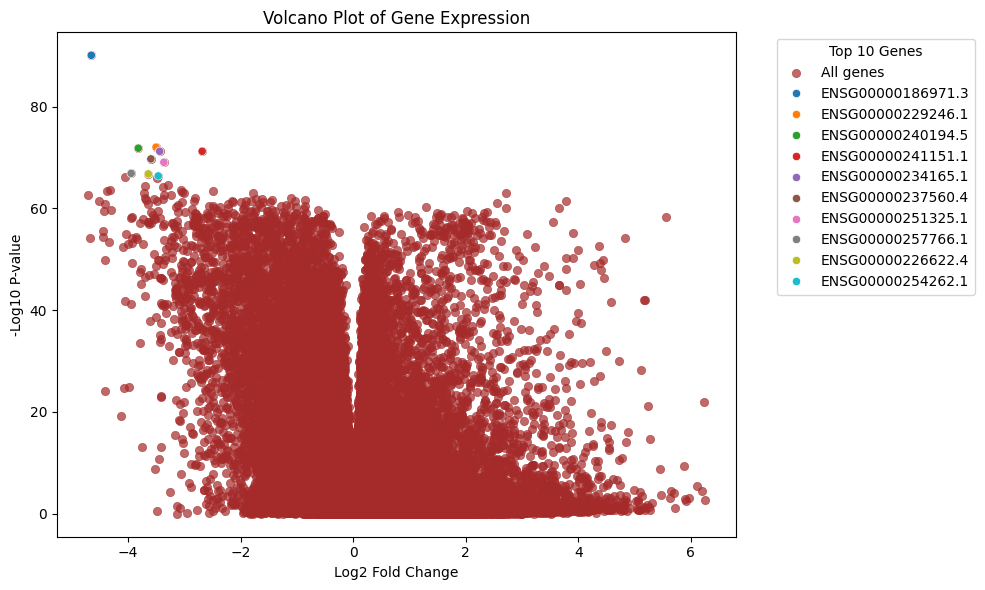

In [21]:

# Convert P-values to negative log10 scale for better visualization
differnt_expression_gene_df['neg_log10_p_value'] = -np.log10(differnt_expression_gene_df['Adjusted_P_Value'])


# Create a volcano plot
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
sns.scatterplot(data=differnt_expression_gene_df, x='log2_Fold_Change', y='neg_log10_p_value', color='brown',edgecolor=None, alpha=0.7,label='All genes')

# Styling
ax.set_title('Volcano Plot of Gene Expression')
ax.set_xlabel('Log2 Fold Change')
ax.set_ylabel('-Log10 P-value')

# the 10 genes with the smallest P-values
top_10_genes = differnt_expression_gene_df.nsmallest(10, 'Adjusted_P_Value')
top_10_genes.reset_index(drop=True, inplace=True)


# Plot the top 10 genes with different colors
# for i, row in top_10_genes.iterrows():
sns.scatterplot(data=top_10_genes,x='log2_Fold_Change', y='neg_log10_p_value', hue='Gene')


# Add legend
plt.legend(title='Top 10 Genes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save plot to PDF
plt.savefig('volcano_plot_gene_expression.pdf')
plt.tight_layout()
plt.show()


The volcano plot highlighted that most genes do not change expression between the tumor and the healthy samples. On the other hand, these top 10 highlit genes are depicted in different colors because they show significant changes where there is considerable fold change, either upregulated or downregulated. Such genes would be interesting for further biological meaning or biomarkers of interest.


1. `X-Axis (Log2 Fold Change):`
 - This axis represents the magnitude of change in gene expression.
 - A log2 fold change of 1 indicates a doubling of expression levels, while a log2 fold change of -1 indicates halving.
 - Points to the right of zero indicate upregulation in Q1 compared to Q4, and points to the left indicate downregulation.

2. `Y-Axis (-Log10 P-value):`
 - This axis represents the significance of the differential expression.
 - Higher values indicate more significant differences. 
 - For example, a p-value of 0.01 translates to -log10(0.01) = 2; hence, higher points are more statistically significant.

3. `Color Coding:`
  - Most points are in red, representing all genes analyzed.
  - The top 10 genes with the smallest adjusted p-values are highlighted in different colors and annotated with their Ensembl IDs.
  - The different colors help in quickly identifying the top differentially expressed genes.

4. `Center of the Plot (Around Zero):`
 - Many data points cluster around a log2 fold change of 0, indicating that these genes do not show a significant change in expression between the two age groups.

5. `Clusters:` The bulk of the data points are clustered around a log2 fold change of 0, indicating that most genes do not significantly change expression between healty and Primary Tumor.

6. `Significant Changes:` Points farther from the center and higher up the y-axis represent genes with significant changes in expression.The highlighted points (top 10 genes) show significant differential expression, with varying degrees of log2 fold change and -log10 p-values.

7. `Symmetry:` If the biological system is balanced, we might expect a symmetric distribution around the log2 fold change of 0, with similar numbers of upregulated and downregulated genes.
Here, we can inspect the symmetry and spread to understand the overall changes in gene expression across healty and primary cancer tissues. 


In [22]:
top_10_genes.head()

,Gene,P_Value,log2_Fold_Change,Adjusted_P_Value,neg_log10_p_value
0,ENSG00000186971.3,1.376707e-95,-4.654465,8.326739e-91,90.079525
1,ENSG00000229246.1,3.185537e-77,-3.503859,9.633543e-73,72.016214
2,ENSG00000240194.5,7.394442e-77,-3.819405,1.490793e-72,71.826583
3,ENSG00000241151.1,4.991849e-76,-2.684909,6.038440e-72,71.219075
4,ENSG00000234165.1,4.964663e-76,-3.439516,6.038440e-72,71.219075


## Step 4: Carry out gene set enrichment analysis
- Carry out gene set enrichment analysis with GSEApy’s Enrichr API to find KEGG, GO-MF, GP-CC, and GO-BP pathways that ar significantly enriched with the 10 genes with the smallest P-values identified in Step 3.
- Plot the result using one of GSEApy’s in-built plotting functions.

- `.nsmallest(20, 'P_Value')` :- I am taking 20 samllest Adjusted_P_Value beacuse when I was taking top 10 Adjusted_P_Value I was getting some of external_gene_name NAN and I was getting only 5 gene name after droping NAN data which is less data for `gp.enrichr` and I was not getting result so I choosed 20 p_values.

- `top_20_genes['Gene']`: This accesses the 'Gene' column from the top_20_genes DataFrame.

- `.str.split('.')` : This splits each string in the 'Gene' column at every period ('.'). This will convert each gene name string into a list of substrings.

- `.str[0]` : This selects the first element from each list of substrings, which effectively removes the version number that follows the period in the original gene names.

- `.tolist()`: This converts the resulting pandas Series of gene names into a regular Python list.

- define Biomart ApI with variable name `bm` and making `queries` to filter the response from biomart, the `dataset='hsapiens_gene_ensembl'` giving dataset name, and another param is  `attributes` for passing attributes 



In [23]:
# top 20 gene which have small p_value
top_20_genes = differnt_expression_gene_df.nsmallest(20, 'Adjusted_P_Value')

# Remove version numbers from Ensemble IDs
g_list = top_20_genes['Gene'].str.split('.').str[0].tolist()

queries = {'ensembl_gene_id': g_list}

# mapping the gene_id with gene_names
bm=gp.Biomart()
results = bm.query(dataset='hsapiens_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.head(10)

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
0,ENSG00000165197,VEGFD,2277,GO:0016020
1,ENSG00000165197,VEGFD,2277,GO:0008083
2,ENSG00000165197,VEGFD,2277,GO:0005576
3,ENSG00000165197,VEGFD,2277,GO:0005515
4,ENSG00000165197,VEGFD,2277,GO:0030154
5,ENSG00000165197,VEGFD,2277,GO:0005615
6,ENSG00000165197,VEGFD,2277,GO:0048018
7,ENSG00000165197,VEGFD,2277,GO:0001525
8,ENSG00000165197,VEGFD,2277,GO:0008284
9,ENSG00000165197,VEGFD,2277,GO:0051781


In [24]:
genes_for_enrichment = results['external_gene_name'].dropna().unique().tolist()
genes_for_enrichment

['VEGFD',
 'KRTAP13-4',
 'LINC00377',
 'LINC01497',
 'CYMP',
 'LINC02066',
 'LINC02382',
 'LINC02237',
 'RYR3-DT',
 'LINC01028']

In [25]:
# Perform enrichment analysis using GSEApy's Enrichr API
enrichr_results = gp.enrichr(gene_list=genes_for_enrichment,
                             gene_sets=['KEGG_2021_Human', 'GO_Molecular_Function_2021', 
                                        'GO_Cellular_Component_2021', 'GO_Biological_Process_2021'],
                             organism='Human',
                             outdir='output/enrichr_kegg',
                             cutoff=0.2
                             )

/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-package

In [26]:
enrichr_results.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complic...,1/100,0.048900,0.162496,0,0,22.324355,67.374230,VEGFD
1,KEGG_2021_Human,TNF signaling pathway,1/112,0.054621,0.162496,0,0,19.898899,57.852655,VEGFD
2,KEGG_2021_Human,Relaxin signaling pathway,1/129,0.062673,0.162496,0,0,17.241319,47.755386,VEGFD
3,KEGG_2021_Human,Focal adhesion,1/201,0.096095,0.162496,0,0,10.994444,25.753594,VEGFD
4,KEGG_2021_Human,Rap1 signaling pathway,1/210,0.100196,0.162496,0,0,10.516215,24.193855,VEGFD


/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

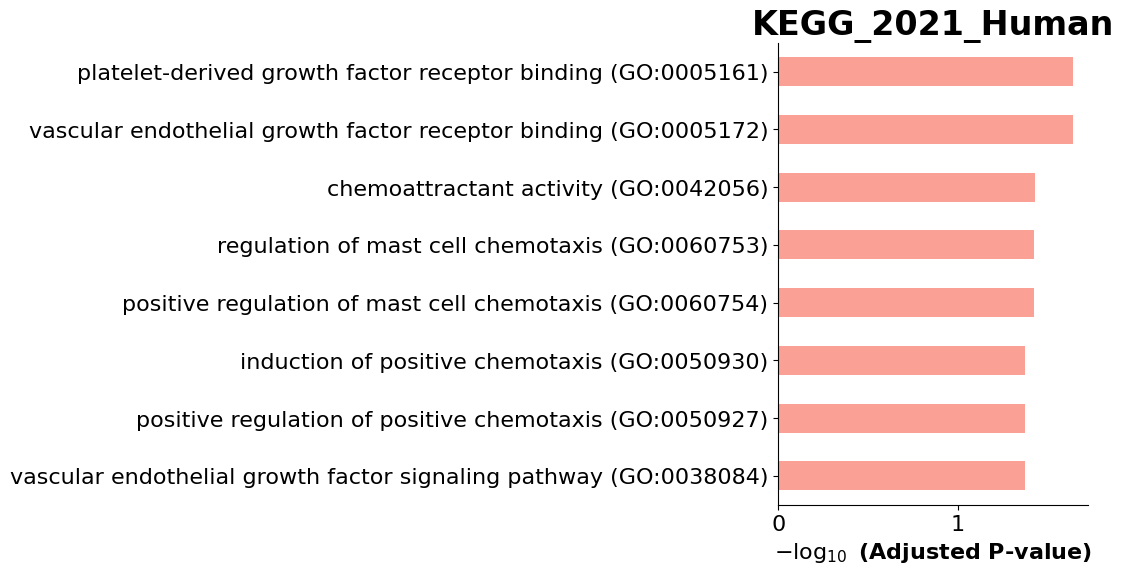

In [27]:
from gseapy.plot import barplot, dotplot
barplot(enrichr_results.results,title='KEGG_2021_Human')

This is a bar chart for the results of a gene set enrichment analysis. Here, it represents the significant enrichment of KEGG database-annotated biological processes or pathways in the human genes. The annotation is described below :

- `X-axis (-log10 (Adjusted P-value)):` This axis represents the statistical significance of the enrichment of each pathway or biological process. The values are given as unfavorable base-10 logarithms of the adjusted p-values.More considerable value indicates more enriched. The small p-values are -log10 transformed for visual representation; the more significant the -log10 value, the smaller the p-value is.

- `Y-axis (Pathways/Processes):` This axis contains the names of biological processes or pathways over-represented in the data set.
In each entry, we display the pathway name and its corresponding Gene Ontology (GO) identifier.

- `Bars Bars:` Each bar represents a specific biological process or pathway. The length of the bar shows the -log10 adjusted p-value, which gives a measure of significance in the enrichment. The longer the bar, the higher the importance of the enrichment.

/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='Combined Score'>

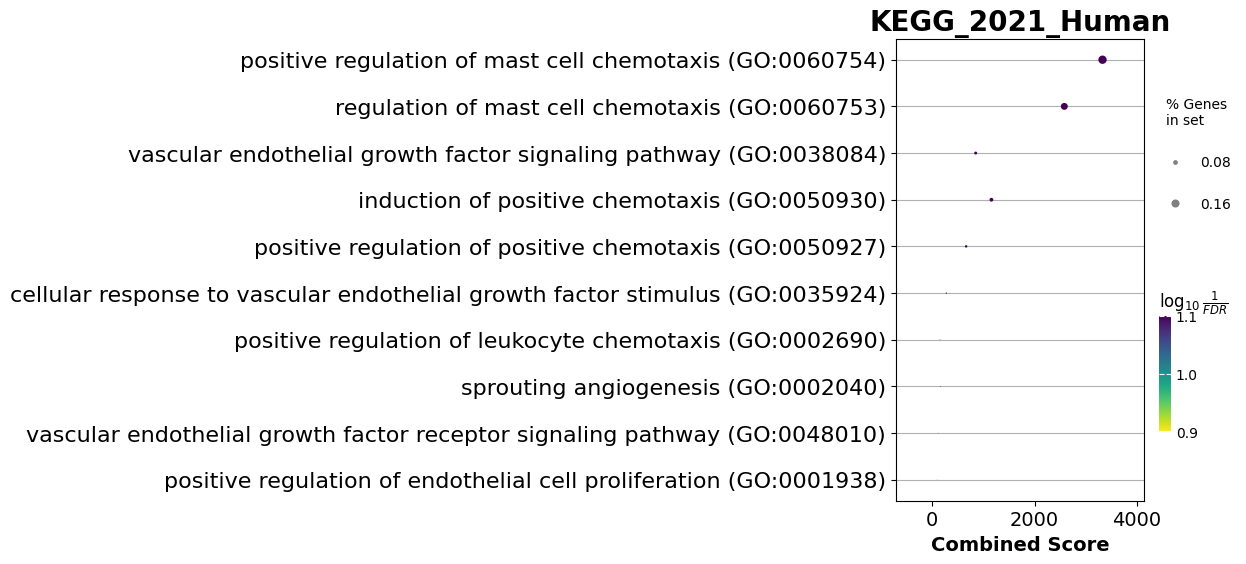

In [28]:
dotplot(enrichr_results.res2d, title='KEGG_2021_Human',cmap='viridis_r',cutoff=0.1)

## Step 5: Same workflow for another phenotype variable

- Identify another biologically or clinically interesting variable provided in the phenotype data. To find such a variable, you can (but do not have to) again take inspiration from thispaper: https://doi.org/10.1093/bib/bbad413. Justify your choice in a Markdown cell.

- Carry out Steps 1 to 4 for the variable you have selected instead of the sample type
variable used before.

I will choose the age_at_initial_pathologic_diagnosis variable, in the primary_tumor_samples data, beacsue of the following points:

- `Relevance:` Primary tumor samples directly reflect the disease state and its molecular characteristics.
 
-`Comparative Analysis:` Comparing age-related differences within tumor samples can reveal insights into how age affects tumor biology and progression.

Primary tumor samples are directly associated with cancer, and age-related differences in gene expression within these samples can provide insights into how aging affects tumor biology, progression, and patient outcomes. This analysis can help identify age-specific biomarkers and therapeutic targets, improving personalized treatment strategies.

In [29]:
# Filter for non-empty age data
phenotype_data_filtered = primary_tumor_samples.loc[~primary_tumor_samples['age_at_initial_pathologic_diagnosis'].isna()].copy()


common_sample_ids = phenotype_data_filtered.index.intersection(gene_expression_df.index)


# Filter both DataFrames to keep only common sample IDs
phenotype_data_filtered = phenotype_data_filtered.loc[common_sample_ids]
gene_expression_data = gene_expression_df.loc[common_sample_ids]


# Define age groups (e.g., split into quartiles)
phenotype_data_filtered.loc[:, 'age_group'] = pd.qcut(phenotype_data_filtered['age_at_initial_pathologic_diagnosis'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Get indices for different age groups
age_groups = phenotype_data_filtered['age_group'].unique()


# Separate the gene expression data based on age groups
expression_data_by_age = {
    age_group: gene_expression_df.loc[phenotype_data_filtered[phenotype_data_filtered['age_group'] == age_group].index]
    for age_group in age_groups
}

# Print the age groups and corresponding sample counts
for age_group, data in expression_data_by_age.items():
    print(f"{age_group}: {data.shape[0]} samples")

Q3: 273 samples
Q4: 273 samples
Q2: 253 samples
Q1: 297 samples


#### For simplicity, let's compare Q1 (youngest quartile) and Q4 (oldest quartile).

In [30]:
# Select samples for Q1 and Q4
q1_samples = expression_data_by_age['Q1']
q4_samples = expression_data_by_age['Q4']

# Convert columns to numeric
q1_samples = q1_samples.apply(pd.to_numeric, errors='coerce')
q4_samples = q4_samples.apply(pd.to_numeric, errors='coerce')

In [31]:

# Perform the Mann-Whitney U test
results = []
for gene in q1_samples.columns:
    u_stat, p_value = mannwhitneyu(q1_samples[gene], q4_samples[gene], alternative='two-sided')
    log2_fold_change = np.log2((q1_samples[gene].mean() + 1e-2) / (q4_samples[gene].mean() + 1e-2))
    results.append({'Gene': gene, 'P_Value': p_value, 'log2_Fold_Change': log2_fold_change})

# Convert results to DataFrame
results_df = pd.DataFrame(results)


In [32]:
# Correct for multiple testing
results_df['Adjusted_P_Value'] = multipletests(results_df['P_Value'], method='fdr_bh')[1]


In [33]:
# Save the results to a CSV file
results_df.to_csv('different_gene_expression_analysis_results_sample_age.csv', index=False)

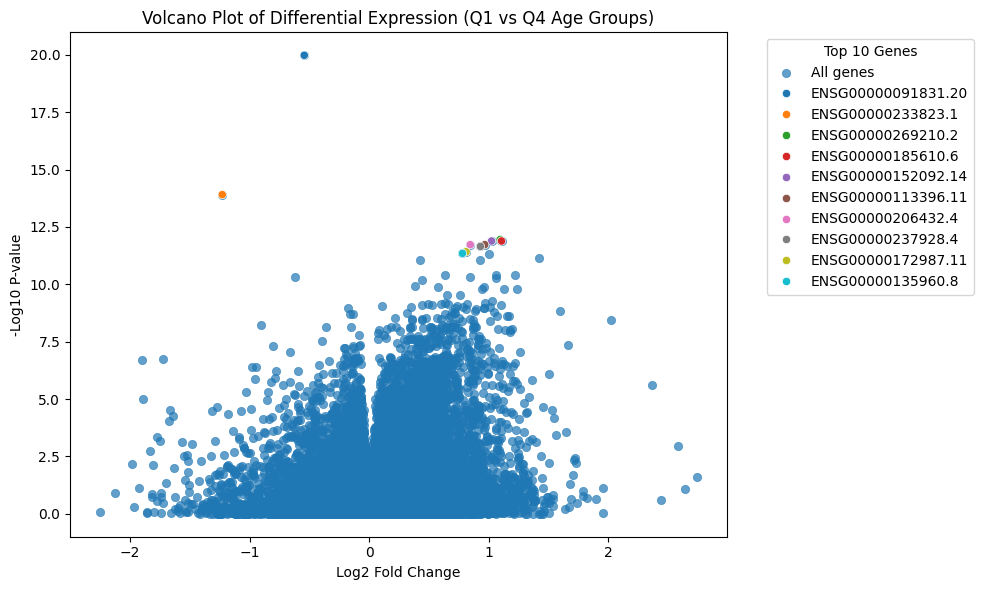

In [34]:

# Convert P-values to negative log10 scale for better visualization
results_df['neg_log10_p_value'] = -np.log10(results_df['Adjusted_P_Value'])


# Create a volcano plot
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
sns.scatterplot(data=results_df, x='log2_Fold_Change', y='neg_log10_p_value', edgecolor=None, alpha=0.7,label='All genes')

# Styling
ax.set_title('Volcano Plot of Differential Expression (Q1 vs Q4 Age Groups)')
ax.set_xlabel('Log2 Fold Change')
ax.set_ylabel('-Log10 P-value')

# the 10 genes with the smallest P-values
top_10_genes_age = results_df.nsmallest(10, 'Adjusted_P_Value')
top_10_genes_age.reset_index(drop=True, inplace=True)


# Plot the top 10 genes with different colors
# for i, row in top_10_genes.iterrows():
sns.scatterplot(data=top_10_genes_age,x='log2_Fold_Change', y='neg_log10_p_value', hue='Gene')


# Add legend
plt.legend(title='Top 10 Genes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save plot to PDF
plt.savefig('volcano_plot_gene_expression_age.pdf')
plt.tight_layout()
plt.show()


The volcano plot effectively visualizes the results of a differential expression analysis, allowing for quick identification of genes that are significantly differentially expressed between the youngest (Q1) and oldest (Q4) age groups in primary tumor samples. The top 10 genes are highlighted for further investigation, representing the most statistically significant and biologically interesting findings from this analysis.

1. `X-Axis (Log2 Fold Change):`
 - This axis represents the magnitude of change in gene expression.
 - A log2 fold change of 1 indicates a doubling of expression levels, while a log2 fold change of -1 indicates halving.
 - Points to the right of zero indicate upregulation in Q1 compared to Q4, and points to the left indicate downregulation.

2. `Y-Axis (-Log10 P-value):`
 - This axis represents the significance of the differential expression.
 - Higher values indicate more significant differences. 
 - For example, a p-value of 0.01 translates to -log10(0.01) = 2; hence, higher points are more statistically significant.

3. `Color Coding:`
  - Most points are in blue, representing all genes analyzed.
  - The top 10 genes with the smallest adjusted p-values are highlighted in different colors and annotated with their Ensembl IDs.
  - The different colors help in quickly identifying the top differentially expressed genes.

4. `Center of the Plot (Around Zero):`
 - Many data points cluster around a log2 fold change of 0, indicating that these genes do not show a significant change in expression between the two age groups.

5. `Clusters:` The bulk of the data points are clustered around a log2 fold change of 0, indicating that most genes do not significantly change expression between the two age groups.

6. `Significant Changes:` Points farther from the center and higher up the y-axis represent genes with significant changes in expression.The highlighted points (top 10 genes) show significant differential expression, with varying degrees of log2 fold change and -log10 p-values.

7. `Symmetry:` If the biological system is balanced, we might expect a symmetric distribution around the log2 fold change of 0, with similar numbers of upregulated and downregulated genes.
Here, we can inspect the symmetry and spread to understand the overall changes in gene expression across age groups.

In [35]:
# top 20 gene which have small p_value
top_20_genes_age = results_df.nsmallest(20, 'P_Value')

# Remove version numbers from Ensemble IDs
g_list = top_20_genes_age['Gene'].str.split('.').str[0].tolist()

queries = {'ensembl_gene_id': g_list}

# mapping the gene_id with gene_names
bm=gp.Biomart()
result_age = bm.query(dataset='hsapiens_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
result_age.head(10)

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
0,ENSG00000077279,DCX,1641,GO:0035556
1,ENSG00000077279,DCX,1641,GO:0008017
2,ENSG00000077279,DCX,1641,GO:0043005
3,ENSG00000077279,DCX,1641,GO:0001764
4,ENSG00000077279,DCX,1641,GO:0035082
5,ENSG00000077279,DCX,1641,GO:0060041
6,ENSG00000077279,DCX,1641,GO:0005737
7,ENSG00000077279,DCX,1641,GO:0042995
8,ENSG00000077279,DCX,1641,GO:0005829
9,ENSG00000077279,DCX,1641,GO:0007420


In [36]:
genes_for_enrichment_age = result_age['external_gene_name'].dropna().unique().tolist()
genes_for_enrichment_age

['DCX',
 'ESR1',
 'BMP5',
 'SLC27A6',
 'TNFSF11',
 'DSC2',
 'EDAR',
 'ASTN1',
 'CAMK4',
 'LRFN5',
 'HPSE2',
 'DBX2',
 'FOXD2',
 'TMEM200C',
 'IGHD',
 'IGHV1-45',
 'IGKV6D-21',
 'NFIA-AS2']

In [37]:
# Perform enrichment analysis using GSEApy's Enrichr API
enrichr_results_age = gp.enrichr(gene_list=genes_for_enrichment_age,
                             gene_sets=['KEGG_2021_Human', 'GO_Molecular_Function_2021', 
                                        'GO_Cellular_Component_2021', 'GO_Biological_Process_2021'],
                             outdir='output/enrichr_kegg',
                             organism='Human',
                             cutoff=0.2
                             )

/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-package

In [38]:
enrichr_results_age.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Prolactin signaling pathway,2/70,0.001782,0.034091,0,0,36.606618,231.725354,TNFSF11;ESR1
1,KEGG_2021_Human,Cytokine-cytokine receptor interaction,3/295,0.002199,0.034091,0,0,13.486301,82.530083,EDAR;TNFSF11;BMP5
2,KEGG_2021_Human,NF-kappa B signaling pathway,2/104,0.003881,0.040101,0,0,24.362745,135.255164,EDAR;TNFSF11
3,KEGG_2021_Human,Osteoclast differentiation,2/127,0.005727,0.044383,0,0,19.857000,102.513736,CAMK4;TNFSF11
4,KEGG_2021_Human,Breast cancer,2/147,0.007600,0.047118,0,0,17.100862,83.446306,TNFSF11;ESR1


/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

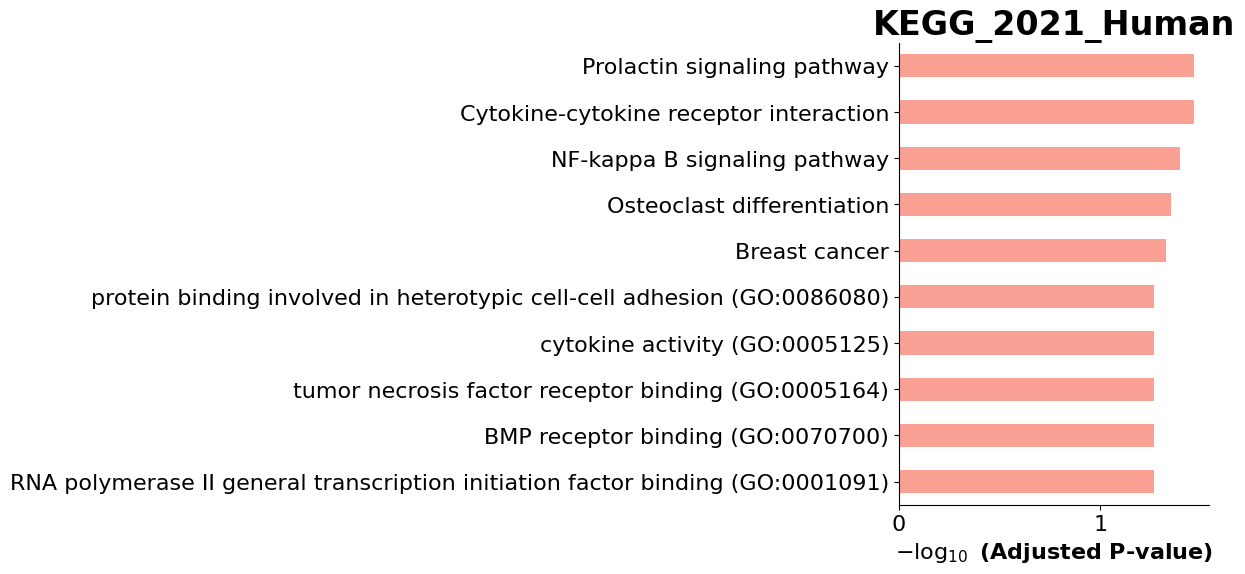

In [39]:
# from gseapy.plot import barplot, dotplot
barplot(enrichr_results_age.results,title='KEGG_2021_Human',cutoff=0.1)

/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/aj/python-intro/intro-bio-life-science-project/python-intro/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021_Human'}, xlabel='Combined Score'>

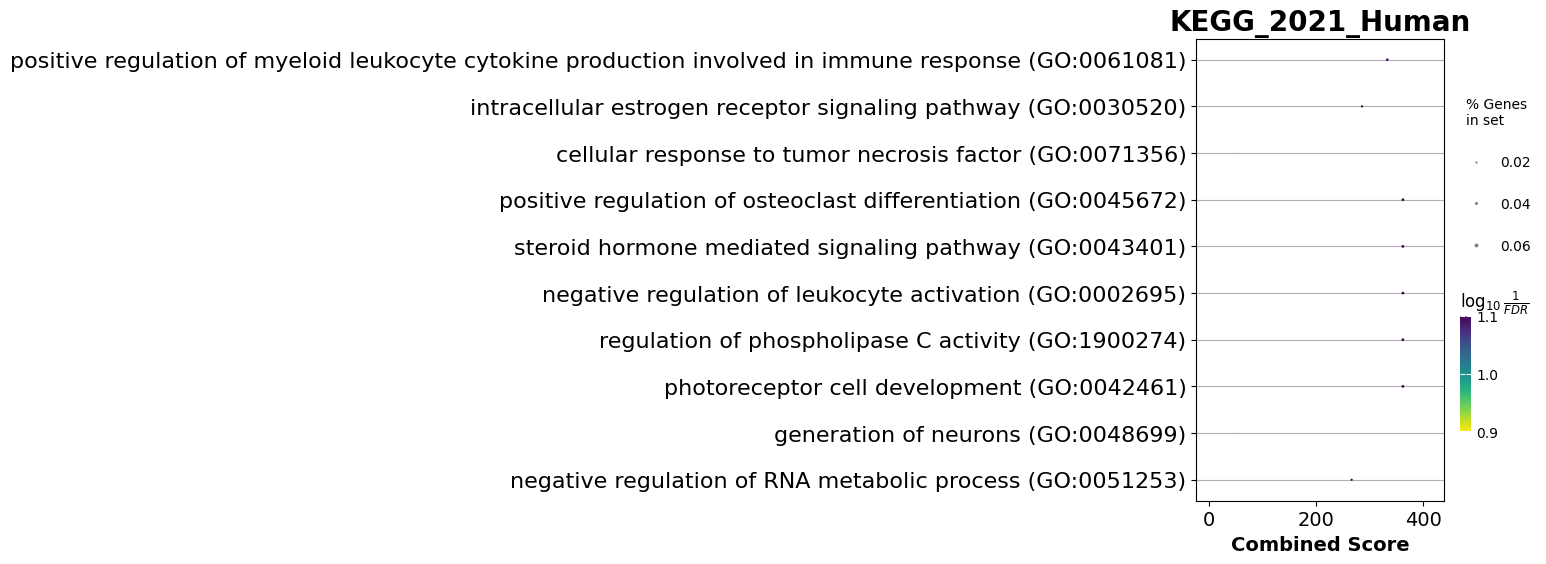

In [40]:
dotplot(enrichr_results_age.res2d, title='KEGG_2021_Human',cmap='viridis_r',cutoff=0.1)